***Importing all the neccessary Libraries***

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

***Loading the dataset using Pandas***

In [11]:
data = pd.read_csv("/content/drive/MyDrive/Data Science/Machine Learning/Decision Tree/Decision Tree Classifier/car_data.csv")

***Exploratory Data Analysis***

In [12]:
#Viewing the data

data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [37]:
#Checking for Null Values and DataTypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   User ID       1000 non-null   int64
 1   Gender        1000 non-null   int64
 2   Age           1000 non-null   int64
 3   AnnualSalary  1000 non-null   int64
 4   Purchased     1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


In [38]:
#Checking for Summary Statistics

data.describe()

,User ID,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.484000,40.106000,72689.000000,0.402000
std,288.819436,0.499994,10.707073,34488.341867,0.490547
min,1.000000,0.000000,18.000000,15000.000000,0.000000
25%,250.750000,0.000000,32.000000,46375.000000,0.000000
50%,500.500000,0.000000,40.000000,72000.000000,0.000000
75%,750.250000,1.000000,48.000000,90000.000000,1.000000
max,1000.000000,1.000000,63.000000,152500.000000,1.000000


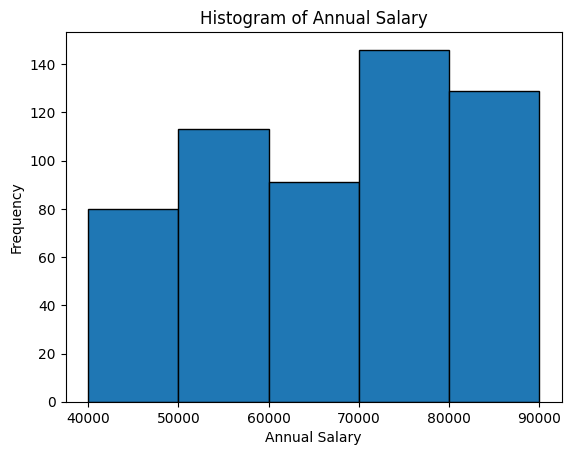

In [53]:
plt.rcParams['patch.force_edgecolor'] = True

plt.hist(data['AnnualSalary'], bins=range(40000, 100000, 10000), edgecolor='black') # Add edgecolor for black outlines
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Salary')
plt.show()

***Data Preprocessing***

In [15]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

In [17]:
X = data.drop('Purchased',axis=1)
y = data['Purchased']

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3
0,-0.400104,1.032529,-0.477120,-1.528498
1,0.625271,1.032529,-0.009905,-0.846767
2,-0.510955,1.032529,0.831082,0.038032
3,1.366589,1.032529,-0.009905,1.009861
4,0.555989,1.032529,-1.411549,0.183081


In [21]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

***Training the Model***

In [23]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

***Model Evauation***

In [24]:
y_pred = model.predict(X_test)

In [29]:
print("Accuracy :",accuracy_score(y_test, y_pred))


Accuracy : 0.905


In [35]:
print("Confusion Matrix :", "\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report :", "\n",classification_report(y_test, y_pred))

Confusion Matrix : 
 [[103   9]
 [ 10  78]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       112
           1       0.90      0.89      0.89        88

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.91      0.90       200

